<H2> Question 1 </H2>

In [8]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# uint8 arrays of RGB image data and their category labels
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Number of classes
K = len(np.unique(y_train)) 

# Number of train images
Ntr = x_train.shape[0]
# Number of test images
Nte = x_test.shape[0]

# Pixels in an image 
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)

# Centering data by subtracting mean
x_train = x_train - mean_image
x_test = x_test - mean_image

# Denoting the relevant class in a binary manner
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshaping 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [9]:
# Setting the initial values of parameters W,b
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)

# Defining parameters
batch_size = Ntr # The whole set of training images are taken as the bach size here
epochs = 300 # Iterations
lr = 0.014  # Learning rate
lr_decay= 0.999
reg = 5e-6 # Regularization 

loss_history = []
acc_list =[]

seed = 0
rng = np.random.default_rng(seed=seed)

def data(Ntr, x_train, y_train):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    x = x_train[indices]
    y = y_train[indices]

    y_pred = x.dot(w1) + b1
    loss = (1./Ntr)*np.square(y_pred -y).sum() + reg * np.sum( w1 * w1 )
    loss_history.append(loss)
    
    acc = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y, axis =1))
    acc = acc/Ntr
    acc_list.append(acc)

    return [x,y,y_pred,loss,acc]

for t in range(epochs):
    train_data = data(Ntr, x_train, y_train)

    x = train_data[0]
    y = train_data[1]
    y_pred = train_data[2]
    loss_train = train_data[3]
    acc_train = train_data[4]
    
    test_data = data(Nte, x_test, y_test)
    loss_test = test_data[3]
    acc_test = test_data[4]
    
    if (t+1)%50 ==0 or t ==0:
        print('Epoch %d / %d: Training Loss : %f | Testing Loss : %f | Training Accuracy : %f | Testing Accuracy : %f' % (t+1, epochs, loss_train, loss_test, acc_train, acc_test))
        
    # Backward pass
    dy_pred = (1./batch_size)*2.0*(y_pred -y) # partial derivative of L w.r.t y_hat
    dw1 = x.T.dot(dy_pred) + reg*w1
    db1 = dy_pred.sum(axis =0)

    # parameters for gradient descent
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *= lr_decay

w1: (3072, 10)
b1: (10,)
Epoch 1 / 300: Training Loss : 1.000025 | Testing Loss : 1.000023 | Training Accuracy : 0.085800 | Testing Accuracy : 0.087000
Epoch 50 / 300: Training Loss : 0.805991 | Testing Loss : 0.806511 | Training Accuracy : 0.392340 | Testing Accuracy : 0.390200
Epoch 100 / 300: Training Loss : 0.792726 | Testing Loss : 0.794369 | Training Accuracy : 0.404660 | Testing Accuracy : 0.396100
Epoch 150 / 300: Training Loss : 0.788494 | Testing Loss : 0.791106 | Training Accuracy : 0.411240 | Testing Accuracy : 0.398500
Epoch 200 / 300: Training Loss : 0.785993 | Testing Loss : 0.789415 | Training Accuracy : 0.414940 | Testing Accuracy : 0.401500
Epoch 250 / 300: Training Loss : 0.784234 | Testing Loss : 0.788347 | Training Accuracy : 0.417640 | Testing Accuracy : 0.404100
Epoch 300 / 300: Training Loss : 0.782901 | Testing Loss : 0.787617 | Training Accuracy : 0.419500 | Testing Accuracy : 0.405700


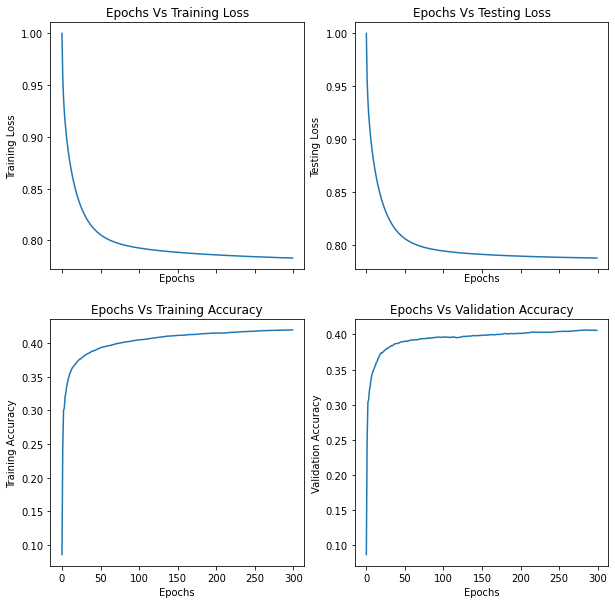

In [10]:
tr_loss = loss_history[::2]
te_loss = loss_history[1::2]

tr_acc = acc_list[::2]
te_acc = acc_list[1::2]

fig, ax = plt.subplots(2,2, figsize = (10,10), sharex=True)
ax[0,0].plot(tr_loss)
ax[0,0].set_title('Epochs Vs Training Loss')
ax[0,0].set(xlabel='Epochs', ylabel='Training Loss')

ax[0,1].plot(te_loss)
ax[0,1].set_title('Epochs Vs Testing Loss')
ax[0,1].set(xlabel='Epochs', ylabel='Testing Loss')

ax[1,0].plot(tr_acc)
ax[1,0].set_title('Epochs Vs Training Accuracy')
ax[1,0].set(xlabel='Epochs', ylabel='Training Accuracy')

ax[1,1].plot(te_acc)
ax[1,1].set_title('Epochs Vs Validation Accuracy')
ax[1,1].set(xlabel='Epochs', ylabel='Validation Accuracy')

plt.show()

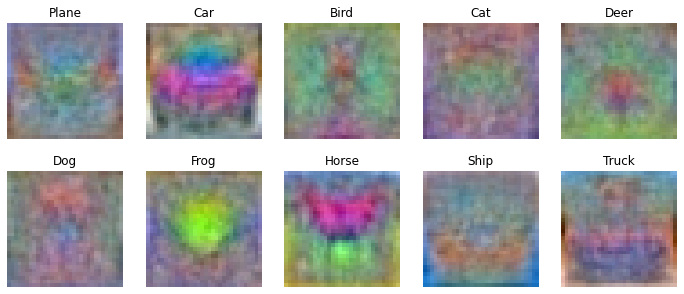

In [11]:
fig, ax = plt.subplots(2,5, figsize=(12,5))
classes =['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse' , 'Ship', 'Truck']

weights = w1 - np.min(w1)

imgs = (weights/np.max(weights)*255).astype('uint8')
for i in range(10):
 
    img = imgs[:,i].reshape(32,32,3) #CIFR10
    
    if i<=4:
        ax[0,i].imshow(img)
        ax[0,i].axis('off')
        ax[0,i].set_title(classes[i])
    else:
        ax[1,i-5].imshow(img)
        ax[1,i-5].axis('off')
        ax[1,i-5].set_title(classes[i])
plt.show()


<H2>Question 2 </H2>

In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
# Number of classes
K = len(np.unique(y_train)) 
# Number of train images
Ntr = x_train.shape[0]
# Number of test images
Nte = x_test.shape[0]

# Pixels in an image 
Din = 3072 # CIFAR10

mean_image = np.mean(x_train, axis=0)

# Centering data by subtracting mean
x_train = x_train - mean_image
x_test = x_test - mean_image

# Denoting the relevant class in a binary manner
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshaping 
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Setting the initial values of parameters W,b
std=1e-5
H = 200 # Nodes in the hidden layer
w1 = std*np.random.randn(Din, H) # layer 1 weights
w2 = std*np.random.randn(H,K) # layer 2 weights
b1 = np.zeros(H) # layer 1 bias
b2 = np.zeros(K) # layer 2 bias

print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)

# Defining parameters
batch_size = Ntr # The whole set of training images are taken as the bach size here
epochs = 300 # Iterations
lr = 0.014  # Learning rate
lr_decay= 0.999
reg = 5e-6 # Regularization 

loss_history = []
acc_list = []

seed = 0
rng = np.random.default_rng(seed=seed)

def data(Ntr, x_train, y_train):
    indices = np.arange(Ntr)
    rng.shuffle(indices)

    x = x_train[indices]
    y = y_train[indices]

    # Sigmoid function as the activation function for hidden nodes
    h = 1.0/(1.0 + np.exp(-(x.dot(w1) +b1))) 
    y_pred = h.dot(w2) + b2 # Predicted class
    # Mean Sum of Squared Errors function as the Loss function 
    loss = (1./Ntr)*np.square(y_pred -y).sum() + reg * (np.sum(w2 * w2) + np.sum( w1 * w1 ))
    loss_history.append(loss)
    
    acc = np.sum(np.argmax(y_pred, axis=1) == np.argmax(y, axis =1))
    acc = acc/Ntr
    acc_list.append(acc)

    return [x,y,y_pred,loss,acc,h]
for t in range(epochs):
    train_data = data(Ntr, x_train, y_train)

    x = train_data[0]
    y = train_data[1]
    y_pred = train_data[2]
    loss_train = train_data[3]
    acc_train = train_data[4]
    h = train_data[5]

    test_data = data(Nte, x_test, y_test)
    loss_test = test_data[3]
    acc_test = test_data[4]
    
    if (t+1)%50 ==0 or t ==0:
        print('Epoch %d / %d: Training Loss : %f | Testing Loss : %f | Training Accuracy : %f | Testing Accuracy : %f' % (t+1, epochs, loss_train, loss_test, acc_train, acc_test))
        
    # Backward pass
    dy_pred = 1./batch_size*2.0*(y_pred -y) # partial derivative of L w.r.t y_hat
    dw2 = h.T.dot(dy_pred) + reg*w2 # partial derivative of y_hat w.r.t w of layer 2
    db2 = dy_pred.sum(axis =0) # partial derivative of y_hat w.r.t w of layer 2
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis =0)
    
    # decrementing parameters for gradient descent
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    lr *= lr_decay

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
Epoch 1 / 300: Training Loss : 1.000101 | Testing Loss : 1.000101 | Training Accuracy : 0.100000 | Testing Accuracy : 0.100000
Epoch 50 / 300: Training Loss : 0.817240 | Testing Loss : 0.818356 | Training Accuracy : 0.338100 | Testing Accuracy : 0.339300
Epoch 100 / 300: Training Loss : 0.784239 | Testing Loss : 0.788351 | Training Accuracy : 0.393660 | Testing Accuracy : 0.386300
Epoch 150 / 300: Training Loss : 0.772168 | Testing Loss : 0.779835 | Training Accuracy : 0.411800 | Testing Accuracy : 0.400500
Epoch 200 / 300: Training Loss : 0.750871 | Testing Loss : 0.764897 | Training Accuracy : 0.443960 | Testing Accuracy : 0.427600
Epoch 250 / 300: Training Loss : 0.743530 | Testing Loss : 0.762714 | Training Accuracy : 0.456260 | Testing Accuracy : 0.426700
Epoch 300 / 300: Training Loss : 0.739151 | Testing Loss : 0.761907 | Training Accuracy : 0.459300 | Testing Accuracy : 0.429900


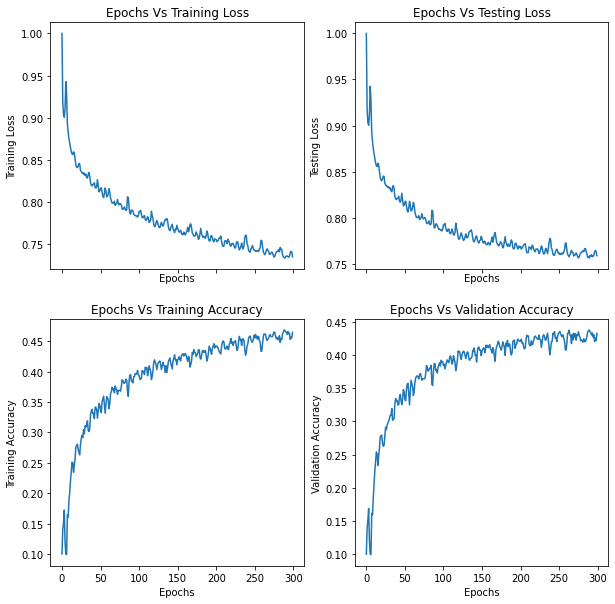

In [39]:
tr_loss = loss_history[::2]
te_loss = loss_history[1::2]

tr_acc = acc_list[::2]
te_acc = acc_list[1::2]

fig, ax = plt.subplots(2,2, figsize = (10,10), sharex=True)
ax[0,0].plot(tr_loss)
ax[0,0].set_title('Epochs Vs Training Loss')
ax[0,0].set(xlabel='Epochs', ylabel='Training Loss')

ax[0,1].plot(te_loss)
ax[0,1].set_title('Epochs Vs Testing Loss')
ax[0,1].set(xlabel='Epochs', ylabel='Testing Loss')

ax[1,0].plot(tr_acc)
ax[1,0].set_title('Epochs Vs Training Accuracy')
ax[1,0].set(xlabel='Epochs', ylabel='Training Accuracy')

ax[1,1].plot(te_acc)
ax[1,1].set_title('Epochs Vs Validation Accuracy')
ax[1,1].set(xlabel='Epochs', ylabel='Validation Accuracy')

plt.show()

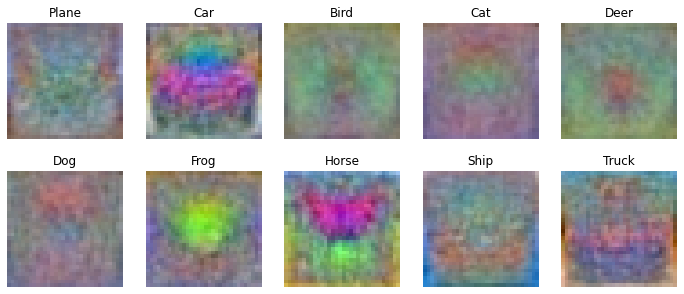

In [40]:
fig, ax = plt.subplots(2,5, figsize=(12,5))
classes =['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse' , 'Ship', 'Truck']

weights = w1.dot(w2) - np.min(w1.dot(w2))

imgs = (weights/np.max(weights)*255).astype('uint8')
for i in range(10):
 
    img = imgs[:,i].reshape(32,32,3) #CIFR10
    
    if i<=4:
        ax[0,i].imshow(img)
        ax[0,i].axis('off')
        ax[0,i].set_title(classes[i])
    else:
        ax[1,i-5].imshow(img)
        ax[1,i-5].axis('off')
        ax[1,i-5].set_title(classes[i])
plt.show()
